# GPGN409 homework 
your name: Benjamin Nguyen

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Define the problem

### 1. Formulate the **FORWARD PROBLEM** to predict the hight of the ballistic object

#### X Motion:
The equation for motion in the x-direction is given by:

$$
x = v \cos(\theta) \, t
$$

Solving for time \( t \):

$$
t = \frac{x}{v \cos(\theta)}
$$

#### Z Motion:
The equation for motion in the z-direction is:

$$
z = z_0 + v \sin(\theta) \, t - \frac{g t^2}{2}
$$

Substitute the expression for \( t \) from the x-motion:

$$
z = z_0 + \tan(\theta) \, x - \frac{g}{2 v^2 \cos^2(\theta)} x^2
$$

This can be rewritten in matrix form as:

$$
z = 
\begin{bmatrix} 
1 & x & x^2 
\end{bmatrix}
\begin{bmatrix} 
a \\ 
b \\ 
c 
\end{bmatrix}
$$

where:

- $a = z_0$
- $b = \tan(\theta)$
- $c = \frac{g}{2 v^2 \cos^2(\theta)}$

### The Model and Data

The model parameters are represented as a vector:

$$
\mathbf{m} = \begin{bmatrix} a \\ b \\ c \end{bmatrix}
$$

where:
- $a = z_0$ (initial height)
- $b = \tan(\theta)$ (slope related to the angle of projection)
- $c = \frac{g}{2 v^2 \cos^2(\theta)}$ (coefficient related to gravity and velocity)

The data is given by:

$$
\mathbf{z} = \{z_i\}
$$

Model parameter: $z_0$, $\theta$, $v$
Data parameter: $x$, $z$, $s$

#### Relation Between Model and Parameters

The relationship between the model parameters and the data can be expressed as:

$$
\mathbf{z} = G \cdot \mathbf{m}
$$

where:
- $\mathbf{z}$ is the vector of observed data points.
- $G$ is the matrix operator (forward operator) that relates the model parameters to the observed data.


**There is one thing wondering that is there any possibility that $x_0$ is $z_0$ ?**

### 2. Formulate the **INVERSE PROBLEM** to predict the hight of the ballistic object

The inverse problem in this case is to estimate the height of a ballistic object by fitting a model to the observed data while accounting for uncertainties in the measurements. This can be done using the **Weighted Least Squares (WLS)** method, which allows us to assign different weights to data points based on their uncertainties.

#### Least Squares and Weighted Least Squares

In the standard least squares method, we aim to minimize the residuals between the observed data and the predicted data. The residuals are defined as:

$$
\mathbf{r} = \|\mathbf{z} - G \cdot \mathbf{m}\|
$$

where:
- $\mathbf{z}$ is the vector of observed data.
- $G$ is the matrix operator (forward operator).
- $\mathbf{m}$ is the vector of model parameters.

In the **Weighted Least Squares** method, we introduce a weight matrix $W$ to account for different levels of uncertainty in the data. The weights are typically inversely proportional to the variance of the measurements, giving lower weights to data points with higher uncertainties.

The objective is to minimize the weighted residuals:

$$
\mathbf{r}_{\text{weighted}} = \| W (\mathbf{z} - G \cdot \mathbf{m}) \|
$$

where:
- $W$ is the diagonal weight matrix with elements $w_i = \frac{1}{\sigma_i^2}$, where $\sigma_i^2$ represents the variance (uncertainty) of the $i$-th observation.
- Higher uncertainties result in lower weights, ensuring that data points with greater uncertainty have less influence on the solution.

THe solution is:

$$
\mathbf{m} = (G^T W^T W G)^{-1} G^T W^T W \mathbf{z}
$$

Remember:

$$
\mathbf{m} = \begin{bmatrix} a \\ b \\ c \end{bmatrix}
$$

where:
- $a = z_0$ (initial height)
- $b = \tan(\theta)$ (slope related to the angle of projection)
- $c = \frac{g}{2 v^2 \cos^2(\theta)}$ (coefficient related to gravity and velocity)

therefore, after getting the value of a, b, c. We need to calculate the value of $x_0$, $theta$ and $v$


In [9]:
# define the constant
g = 9.8

# read data
data = pd.read_csv('hw2data.txt', delim_whitespace=True)
data

/tmp/ipykernel_17680/2855873295.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('hw2data.txt', delim_whitespace=True)


,x(km),z(km),s(km)
0,3.98,3.65,0.87
1,4.90,5.19,0.31
2,5.19,5.18,0.24
3,5.73,5.65,0.18
4,7.73,6.71,0.11
5,8.39,6.80,0.21
6,9.77,6.51,0.68
7,11.56,6.23,0.21
8,11.78,5.40,1.16
9,13.51,4.14,0.69


In [10]:
# take the values of x, z, s for calculation and convert to m:
x = data['x(km)'].to_numpy() * 1000
z = data['z(km)'].to_numpy() * 1000
s = data['s(km)'].to_numpy() * 1000

In [11]:
x

array([ 3980.,  4900.,  5190.,  5730.,  7730.,  8390.,  9770., 11560.,
       11780., 13510., 14050., 15050., 16010.])

In [12]:
# Create the matrix with rows [1, x, x^2] which is G
G = np.column_stack((np.ones(x.shape), x, x**2))

# Create the weight matrix, with weight is presented in a diagonal.
W = 1/np.sqrt(s)
W = np.diag(W)

# Calculate the model
# m = (G^T W^T W G)^{-1} G^T W^T W z
m = np.linalg.inv(G.T @ W.T @ W @ G) @ G.T @ W.T @ W @ z

#paremeters:
m

array([-2.52698313e+03,  2.10422407e+00, -1.17801016e-04])

Therefore

$z_0 = -2.52698313e+03,$

$\tan(\theta) = 2.10422407$

$ \frac{g}{2 v^2 \cos^2(\theta)} = -1.17801016e-04$


In [13]:
x_inv = np.linspace(0, 17000, 20)
z_inv = m[0] + m[1] * x_inv + m[2] * x_inv**2

Plot the observations and the trajectory of the ballistic object using the parameters obtained from your solution to the INVERSE PROBLEM

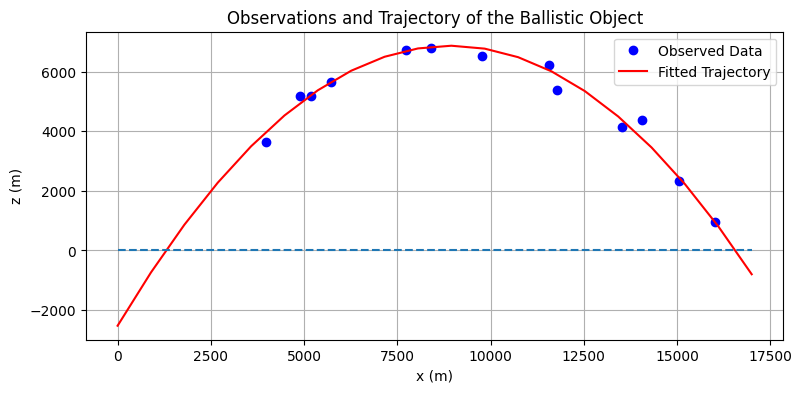

In [14]:
# Plot the observations and trajectory

plt.figure(figsize=(9,4))
plt.plot(x, z, 'o', label='Observed Data', color='blue')  # Plot observed data
plt.plot(x_inv, z_inv, '-', label='Fitted Trajectory', color='red')  # Plot fitted trajectory

# Add title and labels
plt.title('Observations and Trajectory of the Ballistic Object')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.legend()  # Show legend
plt.hlines(y=0, xmin=min(x_inv), xmax=max(x_inv), color='tab:blue', linestyle='--')
plt.grid(True)  # Add grid for better visualization
plt.show()

In [15]:
# Calculate theta in radians
theta_rad = np.arctan(m[1])

# Convert theta to degrees
theta_deg = np.degrees(theta_rad)

# Calculate cos(theta)
cos_theta = np.cos(theta_rad)

# Solve for v
v_squared = g / (2 * abs(m[2]) * cos_theta**2)
v = np.sqrt(v_squared)
print(f"At z0: {m[0]} m")
print(f"Theta (in radians): {theta_rad}")
print(f"Theta (in degrees): {theta_deg}")
print(f"Velocity (v): {v:.2f} m/s")

At z0: -2526.9831310733116 m
Theta (in radians): 1.1271566286572985
Theta (in degrees): 64.58131767225778
Velocity (v): 475.15 m/s


However, we consider z = 0 as the launch position, therefore all other values need to be calculated at z = 0, the launch position.

Solve the equation:
$$
\frac{g}{2v^2 \cos^2(\theta)} x^2 - \tan(\theta) \, x + (z - z_0) = 0
$$

In [16]:
# Convert theta to radians

# Coefficients for the quadratic equation a*t^2 + b*t + c = 0
a = -g / 2
b = v * np.sin(theta_rad)
c = z_0 = m[0]

# Use numpy.roots to solve the quadratic equation
t = np.roots([a, b, c])[1]
print('time t so that z = 0:', t)

# Coefficients for the quadratic equation
A = g / (2 * v**2 * np.cos(theta_rad)**2)
B = -np.tan(theta_rad)
C = - m[0]

xx = np.roots([A, B, C])[1]
print('position x:', xx)

time t so that z = 0: 6.348421462582232
position x: 1294.7599993299173


In [17]:
# Find tind the angle and speed:

v_x = v* np.cos(theta_rad)

# At time z = z0
v_z1 = v* np.sin(theta_rad)
# at time z = 0
v_z2 = v_z1 - g*t

In [18]:
theta = np.arctan(v_z2/v_x)
theta_deg = np.degrees(theta)

print("At z = 0")
print("position x:", xx, 'm')
print("theta:", theta_deg, 'degree')
print("v:", np.sqrt(v_x**2 + v_z2**2), 'm/s')


At z = 0
position x: 1294.7599993299173 m
theta: 60.9342570045663 degree
v: 419.8116720367701 m/s


### 3. What is the maximum height z of the ballistic object and at what coordinate x did it occur

In [19]:
z_max = z_0 + (v**2 * np.sin(theta_rad)**2) / (2 * g)
print("maximum height z of the ballistic object:", z_max)

maximum height z of the ballistic object: 6869.707822892551


In [20]:
# Calculate time to reach maximum height
t_max = (v * np.sin(theta_rad)) / g

# Calculate the horizontal distance at maximum height
x_max = v * np.cos(theta_rad) * t_max

print("At coordinate x it occurs:", x_max)

At coordinate x it occurs: 8931.264563679222


### 4. Solve the INVERSE PROBLEM for an increasing number of observation points

/tmp/ipykernel_17680/3272977117.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('hw2data.txt', delim_whitespace=True)


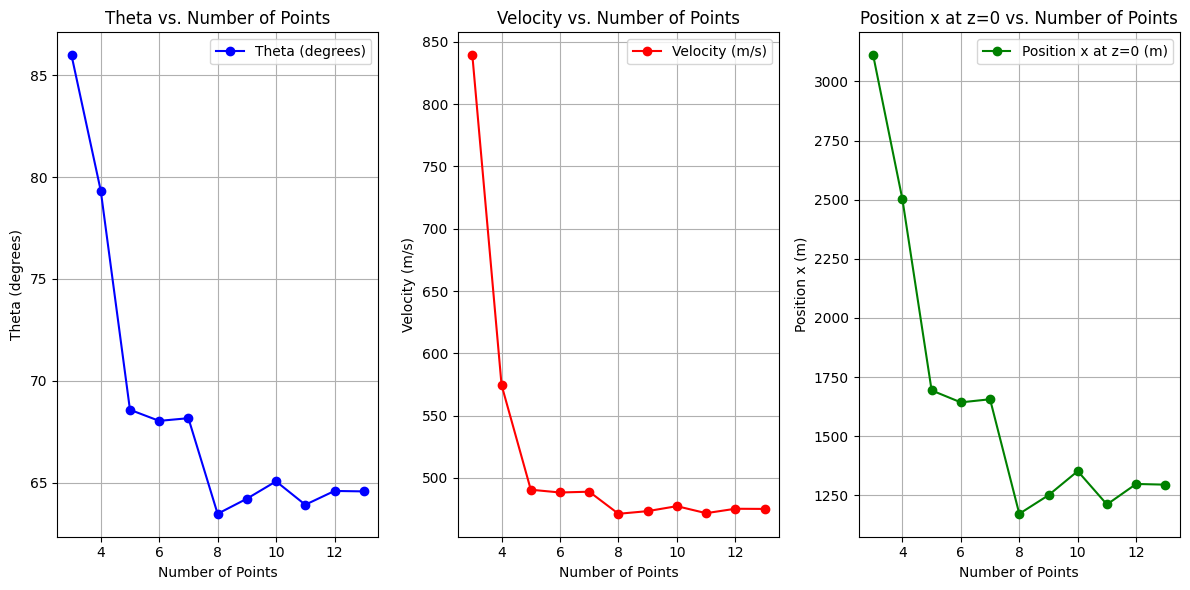

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define constants
g = 9.8

# Read data
data = pd.read_csv('hw2data.txt', delim_whitespace=True)

# Convert data to meters
x_all = data['x(km)'].to_numpy() * 1000
z_all = data['z(km)'].to_numpy() * 1000
s_all = data['s(km)'].to_numpy() * 1000

# Initialize lists to store results
theta_deg_list = []
v_list = []
xx_list = []
n_points = []

# Loop through the points starting from 3 to the maximum number of points
for i in range(3, len(x_all) + 1):
    # Select the first i points for the current iteration
    x = x_all[:i]
    z = z_all[:i]
    s = s_all[:i]

    # Create the matrix with rows [1, x, x^2] which is G
    G = np.column_stack((np.ones(x.shape), x, x**2))

    # Create the weight matrix, with weight represented in a diagonal.
    W = 1 / np.sqrt(s)
    W = np.diag(W)

    # Calculate the model
    # m = (G^T W^T W G)^{-1} G^T W^T W z
    m = np.linalg.inv(G.T @ W.T @ W @ G) @ G.T @ W.T @ W @ z

    # Calculate theta in radians
    theta_rad = np.arctan(m[1])

    # Convert theta to degrees
    theta_deg = np.degrees(theta_rad)

    # Calculate cos(theta)
    cos_theta = np.cos(theta_rad)

    # Solve for v
    v_squared = g / (2 * abs(m[2]) * cos_theta**2)
    v = np.sqrt(v_squared)

    # Coefficients for the quadratic equation a*t^2 + b*t + c = 0
    a = -g / 2
    b = v * np.sin(theta_rad)
    c = m[0]

    # Use numpy.roots to solve the quadratic equation
    t = np.roots([a, b, c])[1]

    # Coefficients for the quadratic equation to find x where z = 0
    A = g / (2 * v**2 * np.cos(theta_rad)**2)
    B = -np.tan(theta_rad)
    C = -m[0]

    # Solve for the x position where z = 0
    xx = np.roots([A, B, C])[1]

    # Store the results
    theta_deg_list.append(theta_deg)
    v_list.append(v)
    xx_list.append(xx)
    n_points.append(i)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot theta in degrees vs number of points
plt.subplot(1, 3, 1)
plt.plot(n_points, theta_deg_list, 'o-', color='blue', label='Theta (degrees)')
plt.xlabel('Number of Points')
plt.ylabel('Theta (degrees)')
plt.title('Theta vs. Number of Points')
plt.grid(True)
plt.legend()

# Plot velocity vs number of points
plt.subplot(1, 3, 2)
plt.plot(n_points, v_list, 'o-', color='red', label='Velocity (m/s)')
plt.xlabel('Number of Points')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Number of Points')
plt.grid(True)
plt.legend()

# Plot position x where z = 0 vs number of points
plt.subplot(1, 3, 3)
plt.plot(n_points, xx_list, 'o-', color='green', label='Position x at z=0 (m)')
plt.xlabel('Number of Points')
plt.ylabel('Position x (m)')
plt.title('Position x at z=0 vs. Number of Points')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


As the number of observation points increases, the parameters appear to converge, indicating that the model becomes more reliable with more data.